# 크롤링

In [4]:
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys


# 웹드라이버 옵션 선택
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)


# 페이지 넘버 저정 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num + 1
    else:
        return num + 9 * (num - 1)


# 크롤링 url 생성 함수
def makeUrl(search, start_pg, end_pg, start_date, end_date):
    # 한 페이지만 크롤링할 경우
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(start_page) + "&pd=3&ds=" + str(start_date) + "&de=" + str(end_date)
        return url
   # url 생성 후 리스트에 저장
    else:
        urls = []
        for i in range(start_pg, end_pg + 1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(page) + "&pd=3&ds=" + str(start_date) + "&de=" + str(end_date)
            urls.append(url)
        return urls


# 검색어 입력
search = input("검색할 키워드:")
page = int(input("시작 페이지:"))  
page2 = int(input("종료 페이지:"))  
date = input("시작 날짜(0000.00.00):") 
date2 = input("종료 날짜(0000.00.00):")
search_urls = makeUrl(search, page, page2, date, date2)


# Chrome driver Manager를 통해 크롬 드라이버 자동 설치 > 최신 버전을 설치 > Service에 저장
service = Service(excutable_path=ChromeDriverManager().install()) 
driver = webdriver.Chrome(service=service)
driver.implicitly_wait(3)

naver_urls = []

# 크롤링 시작
# 뉴스 목록 페이지 불러오기
for i in search_urls:
    driver.get(i)
    time.sleep(1) 
    a = driver.find_elements(By.CSS_SELECTOR, 'a.info')
    
    # 뉴스 클릭 후 접속, url 수집
    for i in a:
        #i.click()
        i.send_keys(Keys.ENTER)
        driver.switch_to.window(driver.window_handles[1])
        time.sleep(3)
        # url 오류 발생시 pass
        try:
            url = driver.current_url
            print(url)
            if "news.naver.com" in url:
                naver_urls.append(url)
            else:
                pass
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
        except:
            pass
print(naver_urls)

# connectionerror 방지
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}
titles = []
contents = []

# 수집된 url에서 뉴스 타이틀, 내용 크롤링
for i in naver_urls:
    original_html = requests.get(i, headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")

    # 타이틀 수집
    title = html.select("div#ct > div.media_end_head.go_trans > div.media_end_head_title > h2")
    title_name = []
    for i in title:
        title_name.append(i.text)
    title_name2 = ''.join(title_name)
    titles.append(title_name2)

    # 내용 수집
    content = html.select("#dic_area")
    content_name = []
    for i in content:
        content_name.append(i.text)
    content_name2 = ''.join(content_name)    
    contents.append(content_name2)

print(titles)
print(contents)

검색할 키워드: 커피 물가
시작 페이지: 1
종료 페이지: 10
시작 날짜(0000.00.00): 2021.01.01
종료 날짜(0000.00.00): 2023.01.01


https://www.seoul.co.kr/
https://n.news.naver.com/mnews/article/081/0003329206?sid=101
https://www.donga.com/
https://n.news.naver.com/mnews/article/020/0003471297?sid=103
https://www.segye.com/
https://n.news.naver.com/mnews/article/022/0003768472?sid=101
https://www.fnnews.com/
https://n.news.naver.com/mnews/article/014/0004947567?sid=101
https://www.joongboo.com/
https://www.moneys.co.kr/
https://n.news.naver.com/mnews/article/417/0000881854?sid=101
https://zdnet.co.kr/
https://n.news.naver.com/mnews/article/092/0002277819?sid=105
https://www.mk.co.kr/
https://n.news.naver.com/mnews/article/009/0005067703?sid=103
https://www.hankookilbo.com/
https://n.news.naver.com/mnews/article/469/0000715539?sid=101
https://www.daejonilbo.com/
https://n.news.naver.com/mnews/article/656/0000038831?sid=102
https://www.daejonilbo.com/
https://n.news.naver.com/mnews/article/656/0000038831?sid=102
https://www.newsworks.co.kr/
https://www.dt.co.kr/
https://n.news.naver.com/mnews/article/029/0002775637?

# wordcount

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 폰트 주소 설정
# 한글 폰트를 가져와 ttf 폴더에 저장
FONT_PATH = '폰트경로'

In [6]:
# 제목과 내용을 합쳐 하나의 문자열로 저장
final_text = ''.join(titles) + ''.join(contents)
print(final_text)

가공식품 인상에 휘청이는 밥상물가“연초부터 ‘물가파괴’ 최저가 승부수”… G마켓·옥션, 2일부터 설빅세일 전개물가 정점 찍었나… 기대인플레 반년 만에 3%대로"물가 잡아라" 내년 '0%' 할당관세 101개로 대폭 확대알고보니 스타벅스는 싼 커피?... 정말 비싼 커피는커피·콜라 등 식음료 줄줄이 인상..."월급은 그대론데"새해벽두 생활물가 ‘들썩’…먹거리부터 생필품 가격 오른다커피는 기프티콘으로, 출근길 3원 벌기…직장인 고물가 생존전략성심당 빵값도 오른다…새해 커피·생필품 줄줄이 가격 인상성심당 빵값도 오른다…새해 커피·생필품 줄줄이 가격 인상티끌모아 커피… 직장인들 `짠테크` 열풍원두 관세 0%에도… 커피값은 못잡는다남양유업, 내달 '초코·딸기에몽' 18%↑…"새해 먹거리 물가 줄인상"정부 올해 8번 ‘물가 안정’ 호소... 1위 식품 아랑곳 “가격 2번 올렸다”[2023 경제정책]"전기·가스요금 더 오른다…커피원두 등 0% 할당관세 유지"대중교통 요금 ‘80% 소득공제’ 연장… 서민물가 안정 총력전 [2023년 경제정책방향]커피믹스 또 가격인상...원가 부담 어떻길래이른 설에 연말부터 선물세트 봇물.."가성비로 물가 부담 덜자"[현장]"영하 11도에도 오픈런" 맥도날드 무료커피 행사에 구름인파커피 소비, 2030년까지 '쭉'…저렴한 원두 인기 뜨거운 이유컵커피 1위 매일유업 ‘바리스타룰스’ 가격 두 달 만에 또 인상농식품부, 식품물가 여전히 높아…업계에 가격 인상 최소화 당부"물가안정 돕는다"…CU, 밀크플레이션에 PB 우유 30% 할인밥상물가 정점은 언제입니까 [기자수첩-유통]커피믹스도 오른다 '속절 없이 오르는 물가'집밥·외식물가 ‘껑충’.. 구내식당도 “다 올라” 뭘  먹으라고高물가 부담에…'명품·옷' 덜 사고 '식품' 할인에 쫑긋물가 급등 멈췄지만, 운송거부·우유·택시·공공요금 변수 남았다자장면·김밥도 10%대 껑충…뛰는 물가 위에 나는 외식비물가 상승 주춤했지만…가공식품·외식물가 '고공행진' 여전“커피값 500원이라도 아끼자”… ‘기프티콘’ 거래

In [33]:
# 불용어 처리
f = open('불용어 모음 파일.txt', "r", encoding="utf-8")
# 라인 기준으로 쪼개기
stopwords = f.read().splitlines()

In [39]:
from konlpy.tag import Okt
# 워드클라우드 결과 확인 후, 불용어 추가
# 커피 제외
stop_words = ['했다','하는','보다','있는','하고', '지난','한다','입니다','따르면','주요','이후','대비','기자','있습니다','특히','이나','커피','가격']
stopwords += stop_words

#형태소 단위로 문장을 분류
okt = Okt()
okt_text = ''
for word in okt.morphs(final_text):
    if (len(word)>1) and (word not in stopwords) :
        okt_text = okt_text + ' ' + word

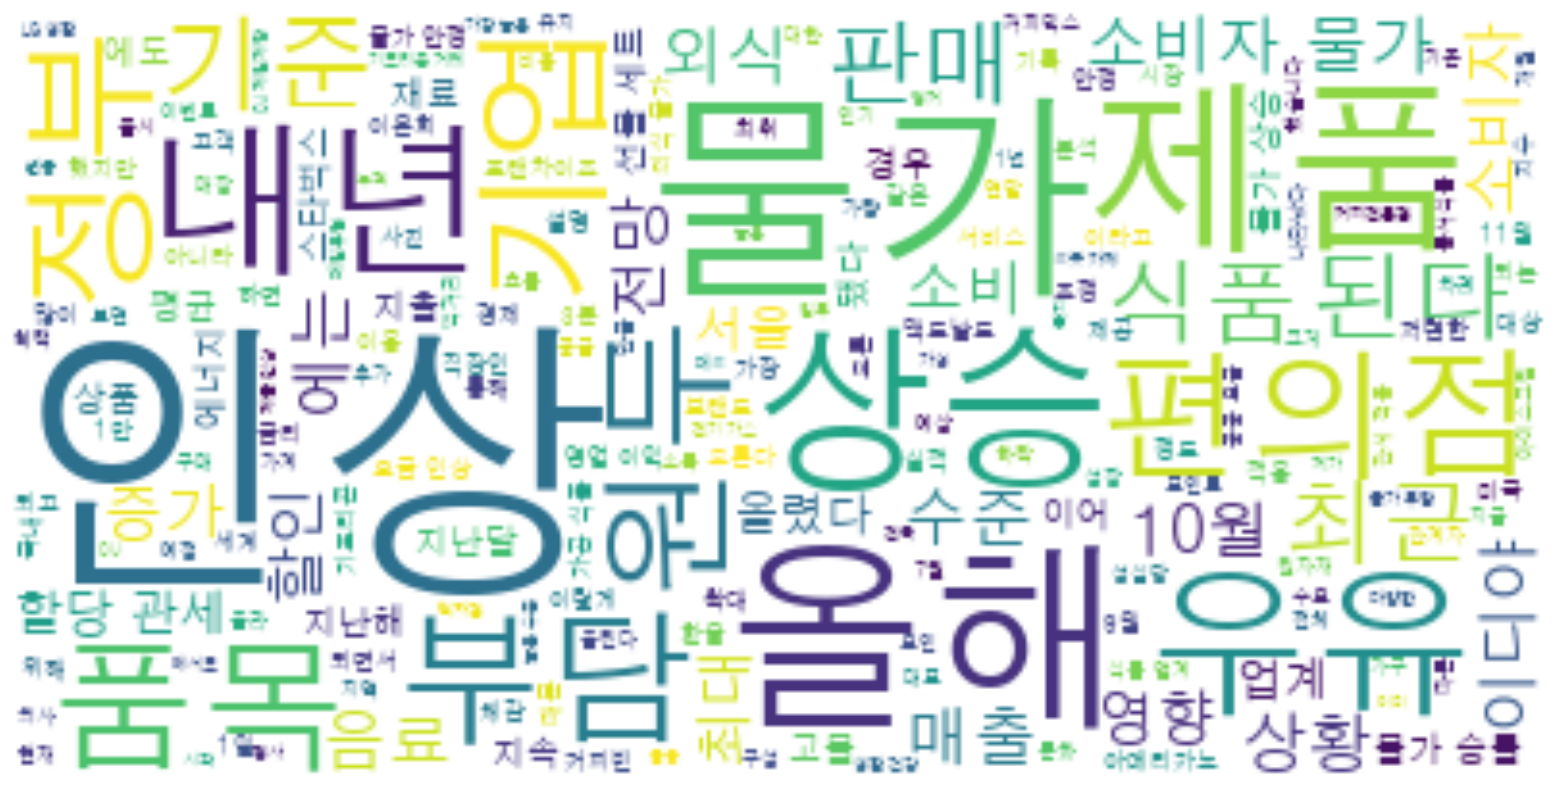

In [42]:
# 크롤링 결과를 워드클라우드로 시각화
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

# 워드클라우드 설정
wordcloud = WordCloud(background_color='white',font_path=FONT_PATH)
# 워드 클라우드 생성
wordcloud.generate(okt_text)

# 이미지 크기
plt.figure(figsize=(20,10))
# 구현 방식
plt.imshow(wordcloud,interpolation='bilinear')
# 축 삭제
plt.axis('off')
plt.show()